<a href="https://colab.research.google.com/github/AdityaPanda01/Stock_analysis-Using-python/blob/main/Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/AdityaPanda01/Stock_analysis-Using-python.git

fatal: destination path 'Stock_analysis-Using-python' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [ ]:
symbols=['AAPL','MSFT','TSLA']
start_date='2023-01-01'
end_date='2023-12-31'
data_box={}
for symbol in symbols:
    data=yf.download(symbol,start=start_date,end=end_date)
    data['Symbol']=symbol
    data_box[symbol]=data
finance_df=pd.concat(data_box.values())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
finance_df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL


In [ ]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2023-01-03 to 2023-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       750 non-null    float64
 1   High       750 non-null    float64
 2   Low        750 non-null    float64
 3   Close      750 non-null    float64
 4   Adj Close  750 non-null    float64
 5   Volume     750 non-null    int64  
 6   Symbol     750 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 46.9+ KB


In [ ]:
finance_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Symbol,0


In [ ]:
sub_data=pd.DataFrame()
sub_data['total_volume']=finance_df.groupby('Symbol')['Volume'].sum()
print(sub_data)

        total_volume
Symbol              
AAPL     14804257200
MSFT      6918889900
TSLA     34330556300


In [ ]:
finance_df['Daily_return_percentage']=finance_df.groupby('Symbol')['Close'].pct_change()*100
finance_df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage
Date,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887


In [ ]:
finance_df['Daily_return_mean'] = finance_df.groupby('Symbol')['Daily_return_percentage'].transform(lambda x: x.rolling(window=10, min_periods=1).mean()) # Use transform to align the result with the original DataFrame index. min_periods=1 ensures that you get a result even for the first few rows of each group where a full window of 10 is not available.
finance_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean
Date,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423,1.031423
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600,AAPL,-0.059931,0.936599
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504318,57809700,AAPL,1.011911,0.946013


In [ ]:
finance_df['voltality_mean'] = finance_df.groupby('Symbol')['Daily_return_percentage'].transform(lambda x: x.rolling(window=10, min_periods=1).std()) # Use transform to align the result with the original DataFrame index. min_periods=1 ensures that you get a result even for the first few rows of each group where a full window of 10 is not available.
finance_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,voltality_mean
Date,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423,1.031423,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,1.479189
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,2.375368
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1.981101
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979,1.734463
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687,1.628130
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600,AAPL,-0.059931,0.936599,1.549872
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504318,57809700,AAPL,1.011911,0.946013,1.435150


In [ ]:
sub_data['volatilty']=finance_df.groupby('Symbol')['Daily_return_percentage'].std()
print(sub_data)

        total_volume  volatilty
Symbol                         
AAPL     14804257200   1.256559
MSFT      6918889900   1.583205
TSLA     34330556300   3.316561


In [ ]:
finance_df['SMA_20'] = finance_df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
finance_df['SMA_50'] = finance_df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=50, min_periods=1).mean())


In [ ]:
finance_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,voltality_mean,SMA_20,SMA_50
Date,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN,NaN,NaN,125.070000,125.070000
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423,1.031423,NaN,125.715000,125.715000
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,1.479189,125.483332,125.483332
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,2.375368,126.517498,126.517498
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1.981101,127.243997,127.243997
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979,1.734463,127.824997,127.824997
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687,1.628130,128.634284,128.634284
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600,AAPL,-0.059931,0.936599,1.549872,129.231249,129.231249
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504318,57809700,AAPL,1.011911,0.946013,1.435150,129.845554,129.845554


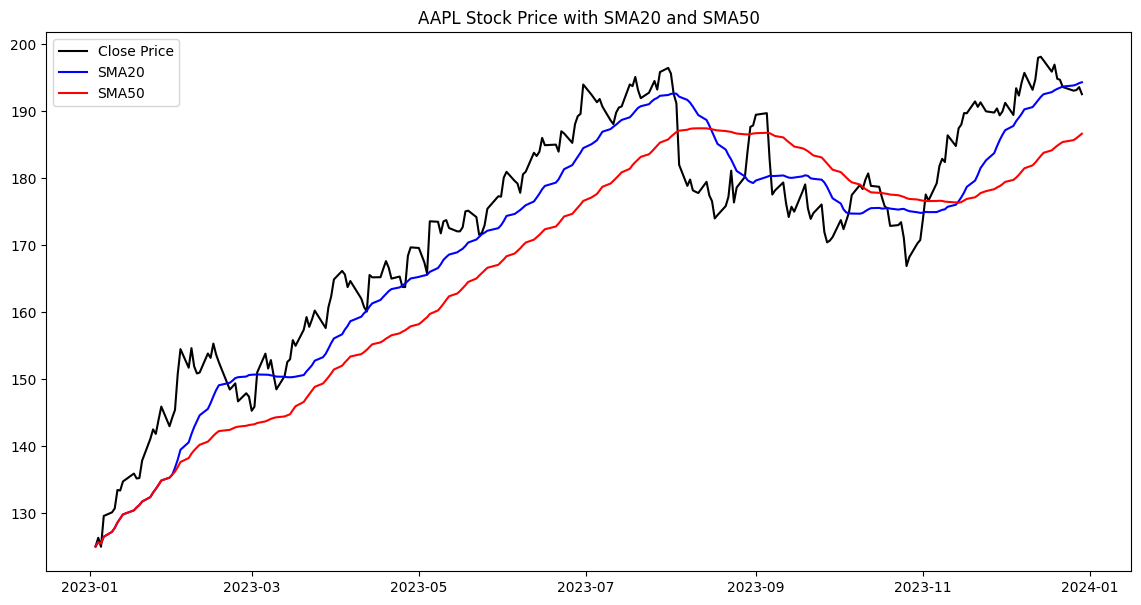

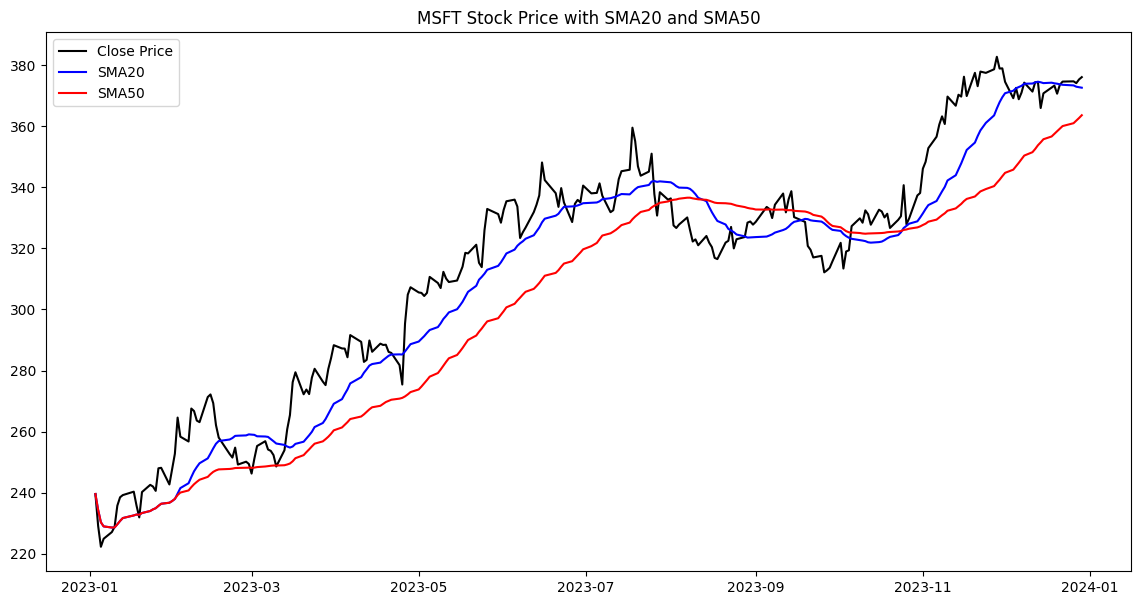

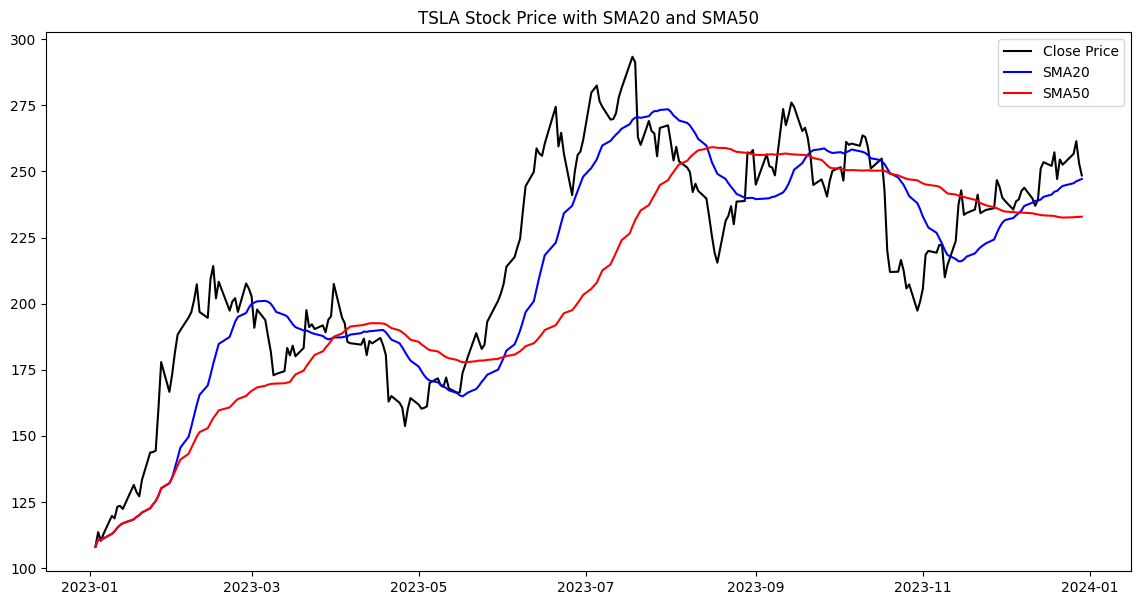

In [ ]:
import matplotlib.pyplot as plt

# Assuming finance_df has a 'Symbol' column
for symbol in finance_df['Symbol'].unique():
    stock_data = finance_df[finance_df['Symbol'] == symbol]

    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Close'], label='Close Price', color='black')
    plt.plot(stock_data['SMA_20'], label='SMA20', color='blue')
    plt.plot(stock_data['SMA_50'], label='SMA50', color='red')
    plt.title(f'{symbol} Stock Price with SMA20 and SMA50')
    plt.legend()
    plt.show()

In [ ]:
#features engineering for ml
finance_df['Price_Change']=finance_df.groupby('Symbol')['Close'].transform(lambda x: (x > x.shift(1)).astype(int)) # Use a lambda function to apply the comparison on each group's 'Close' series
finance_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,voltality_mean,SMA_20,SMA_50,Price_Change
Date,,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN,NaN,NaN,125.070000,125.070000,0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423,1.031423,NaN,125.715000,125.715000,1
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,1.479189,125.483332,125.483332,0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,2.375368,126.517498,126.517498,1
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1.981101,127.243997,127.243997,1
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979,1.734463,127.824997,127.824997,1
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687,1.628130,128.634284,128.634284,1
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600,AAPL,-0.059931,0.936599,1.549872,129.231249,129.231249,0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504318,57809700,AAPL,1.011911,0.946013,1.435150,129.845554,129.845554,1


In [ ]:
finance_df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,voltality_mean,SMA_20,SMA_50,Price_Change
Date,,,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,123.904633,112117500,AAPL,NaN,NaN,NaN,125.070000,125.070000,0
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,AAPL,1.031423,1.031423,NaN,125.715000,125.715000,1
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,1.479189,125.483332,125.483332,0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,2.375368,126.517498,126.517498,1
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1.981101,127.243997,127.243997,1


In [ ]:
clean_df=finance_df.dropna(inplace=False)
clean_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,voltality_mean,SMA_20,SMA_50,Price_Change
Date,,,,,,,,,,,,,
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,1.479189,125.483332,125.483332,0
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,2.375368,126.517498,126.517498,1
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1.981101,127.243997,127.243997,1
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979,1.734463,127.824997,127.824997,1
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687,1.628130,128.634284,128.634284,1
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.166916,71379600,AAPL,-0.059931,0.936599,1.549872,129.231249,129.231249,0
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.504318,57809700,AAPL,1.011911,0.946013,1.435150,129.845554,129.845554,1
2023-01-17,134.830002,137.289993,134.130005,135.940002,134.673386,63646600,AAPL,0.875637,0.938194,1.342665,130.454999,130.454999,1
2023-01-18,136.820007,138.610001,135.029999,135.210007,133.950150,69672800,AAPL,-0.536998,0.790674,1.349097,130.887272,130.887272,0


In [ ]:
clean_df.to_excel('clean_df.xlsx')

In [ ]:
Model_df=clean_df

In [ ]:
# Create lagged columns
Model_df['SMA_20_lag1'] = Model_df['SMA_20'].shift(1)
Model_df['SMA_50_lag1'] = Model_df['SMA_50'].shift(1)
Model_df['voltality_mean_lag1'] = Model_df['voltality_mean'].shift(1)

# Drop the non-lagged columns
Model_df = Model_df.drop(columns=['SMA_20', 'SMA_50', 'voltality_mean'])

<ipython-input-20-a364cd01a577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['SMA_20_lag1'] = Model_df['SMA_20'].shift(1)
<ipython-input-20-a364cd01a577>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['SMA_50_lag1'] = Model_df['SMA_50'].shift(1)
<ipython-input-20-a364cd01a577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
Model_df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Daily_return_percentage,Daily_return_mean,Price_Change,SMA_20_lag1,SMA_50_lag1,voltality_mean_lag1
Date,,,,,,,,,,,,,
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855087,80962700,AAPL,-1.060465,-0.014521,0,NaN,NaN,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412247,87754700,AAPL,3.679410,1.216789,1,125.483332,125.483332,1.479189
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937286,70790800,AAPL,0.408887,1.014814,1,126.517498,126.517498,2.375368
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511887,63896200,AAPL,0.445641,0.900979,1,127.243997,127.243997,1.981101
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.246185,69458900,AAPL,2.111229,1.102687,1,127.824997,127.824997,1.734463


In [ ]:
Model_df.dropna(inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
X1=Model_df.drop(columns=['Price_Change','Close','Adj Close'])
y1=Model_df['Price_Change']

In [ ]:
X1.head()

,Open,High,Low,Volume,Symbol,Daily_return_percentage,Daily_return_mean,SMA_20_lag1,SMA_50_lag1,voltality_mean_lag1
Date,,,,,,,,,,
2023-01-06,126.010002,130.289993,124.889999,87754700,AAPL,3.679410,1.216789,125.483332,125.483332,1.479189
2023-01-09,130.470001,133.410004,129.889999,70790800,AAPL,0.408887,1.014814,126.517498,126.517498,2.375368
2023-01-10,130.259995,131.259995,128.119995,63896200,AAPL,0.445641,0.900979,127.243997,127.243997,1.981101
2023-01-11,131.250000,133.509995,130.460007,69458900,AAPL,2.111229,1.102687,127.824997,127.824997,1.734463
2023-01-12,133.880005,134.259995,131.440002,71379600,AAPL,-0.059931,0.936599,128.634284,128.634284,1.628130


In [ ]:
y1.head()

,Price_Change
Date,
2023-01-06,1
2023-01-09,1
2023-01-10,1
2023-01-11,1
2023-01-12,0


In [ ]:
y1.head()

,Price_Change
Date,
2023-01-06,1
2023-01-09,1
2023-01-10,1
2023-01-11,1
2023-01-12,0


In [ ]:
y1.value_counts()

,count
Price_Change,
1,411
0,332


In [ ]:
X1.replace({'Symbol':{'AAPL':10,'MSFT':20,'TSLA':30}}, inplace=True)

<ipython-input-29-afcb6713c0a9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X1.replace({'Symbol':{'AAPL':10,'MSFT':20,'TSLA':30}}, inplace=True)


In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)


In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled1,y_train1)

LogisticRegression()

In [ ]:
y_pred1=model.predict(X_test_scaled1)

In [ ]:
acc1=accuracy_score(y_test1,y_pred1)
print(acc1)

0.9932885906040269


In [ ]:
X=Model_df.drop(columns=['Price_Change','Close','Adj Close','Daily_return_percentage'])
y=Model_df['Daily_return_percentage']

In [ ]:
X.replace({'Symbol':{'AAPL':10,'MSFT':20,'TSLA':30}}, inplace=True)

<ipython-input-59-ed3d807b63ec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({'Symbol':{'AAPL':10,'MSFT':20,'TSLA':30}}, inplace=True)


In [ ]:
X.head()

,Open,High,Low,Volume,Symbol,Daily_return_mean,SMA_20_lag1,SMA_50_lag1,voltality_mean_lag1
Date,,,,,,,,,
2023-01-06,126.010002,130.289993,124.889999,87754700,10,1.216789,125.483332,125.483332,1.479189
2023-01-09,130.470001,133.410004,129.889999,70790800,10,1.014814,126.517498,126.517498,2.375368
2023-01-10,130.259995,131.259995,128.119995,63896200,10,0.900979,127.243997,127.243997,1.981101
2023-01-11,131.250000,133.509995,130.460007,69458900,10,1.102687,127.824997,127.824997,1.734463
2023-01-12,133.880005,134.259995,131.440002,71379600,10,0.936599,128.634284,128.634284,1.628130


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
feature_importances=rf_model.feature_importances_

In [ ]:
importances_df=pd.DataFrame({'Feature':X.columns,'Importance':feature_importances}).sort_values(by='Importance',ascending=False)
print(importances_df)

               Feature  Importance
3               Volume    0.329374
5    Daily_return_mean    0.280895
8  voltality_mean_lag1    0.131530
7          SMA_50_lag1    0.070032
0                 Open    0.058402
6          SMA_20_lag1    0.049708
1                 High    0.041329
2                  Low    0.035766
4               Symbol    0.002965


In [ ]:
y_pred=rf_model.predict(X_test_scaled)

In [ ]:
root_mean_squared_error=mean_squared_error(y_test,y_pred,squared=False)
print(root_mean_squared_error)

2.1538488099753206


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
